In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)


In [6]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [7]:
from catboost import CatBoostRegressor

cat_reg = CatBoostRegressor(verbose=0, random_state=42)
cat_reg.fit(X_train, y_train)
y_pred_cat = cat_reg.predict(X_test)


In [8]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor(random_state=42)
lgb_reg.fit(X_train, y_train)
y_pred_lgb = lgb_reg.predict(X_test)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 50)


In [10]:
evaluate_regression(y_test, y_pred_xgb, "XGBoost")
evaluate_regression(y_test, y_pred_cat, "CatBoost")
evaluate_regression(y_test, y_pred_lgb, "LightGBM")


XGBoost Results:
Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 0.22
R² Score: 0.83
--------------------------------------------------
CatBoost Results:
Mean Absolute Error (MAE): 0.29
Mean Squared Error (MSE): 0.20
R² Score: 0.85
--------------------------------------------------
LightGBM Results:
Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 0.21
R² Score: 0.84
--------------------------------------------------


In [21]:
results = {
    'Model': ['XGBoost', 'CatBoost', 'LightGBM'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_xgb),
        mean_absolute_error(y_test, y_pred_cat),
        mean_absolute_error(y_test, y_pred_lgb),
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_xgb),
        mean_squared_error(y_test, y_pred_cat),
        mean_squared_error(y_test, y_pred_lgb),
    ],
    'R² Score': [
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_cat),
        r2_score(y_test, y_pred_lgb),
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


      Model       MAE       MSE  R² Score
0   XGBoost  0.309573  0.222590  0.830137
1  CatBoost  0.292955  0.198922  0.848198
2  LightGBM  0.305458  0.211487  0.838610


In [22]:
!pip install matplotlib


In [23]:
import matplotlib.pyplot as plt


In [24]:
results_df.set_index('Model', inplace=True)


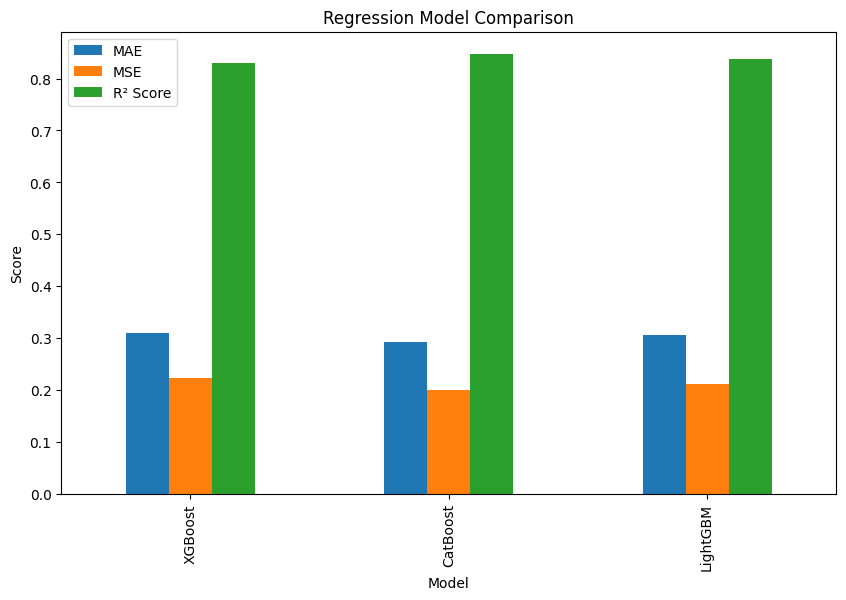

In [25]:
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Regression Model Comparison")
plt.ylabel("Score")
plt.show()
